#Loading Data

In [2]:
import tensorflow
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

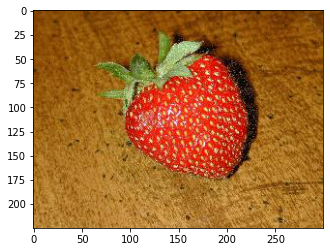

In [36]:
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Data/101_ObjectCategories/train/strawberry/image_0001.jpg')
implot = plt.imshow(img)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#creating objects of ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255) #rescale normalises the pixel values in the range [0, 1]
test_datagen = ImageDataGenerator(rescale = 1/255)

train_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Data/101_ObjectCategories/train')
test_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Data/101_ObjectCategories/test')

In [62]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 832 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


#Convolutional Layers

For two layers, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [ ]:
model.add(
    Conv2D(
        64, #number of neurons in the layer
            #increase if the dataset is large, decrease if small
        kernel_size=3, #the size of the filter matrix: 3 x 3

        activation='relu', #the activation function for the layer

        padding='same',

        strides=(2, 2),

        input_shape = (28, 28, 1) #the shape of each input image
                                  #kept the same as the image dimensions
                                  #only for the first layer
    )
)

#MaxPooling Layer

In [ ]:
model.add(
    MaxPooling2D(pool_size=(2,2),
                 stride=(2,2))
)

#Flatten Layer

#Simple CNN Architecture

* Convolutional layer
* ReLU layer
* Pooling layer
* Convolutional layer
* ReLU layer
* Pooling layer
* Flatten layer
* Dense layer

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [66]:
model = Sequential([
                    #First convolutional layer
                    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                    MaxPooling2D(2, 2),

                    #Second convolutional layer
                    Conv2D(32, (3, 3), activation='relu'),
                    MaxPooling2D(2, 2),

                    #Flatten the pooled feature maps
                    Flatten(),

                    #Fully connected hidden layer
                    Dense(128, activation='relu'),

                    #Output layer
                    Dense(1, activation='sigmoid')
])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

##Compiling the model

In [68]:
model.compile(optimizer='adam', #the optimiser controls the learning rate
              loss='binary_crossentropy', #for binary classification
              metrics=['accuracy']
              )

In [69]:
history = model.fit(
    train_generator,
    steps_per_epoch = 26, #number of images / batch_size
    epochs = 3, #number of times to go through the entire training set
    verbose = 1,
    validation_data = test_generator,
    validation_steps = 4, #number of validation images / batch_size
)

Epoch 1/3
26/26 [==============================] - 25s 979ms/step - loss: -0.4193 - accuracy: 0.5628 - val_loss: -32.6927 - val_accuracy: 0.6016
Epoch 2/3
26/26 [==============================] - 3s 105ms/step - loss: -44.9392 - accuracy: 0.6574 - val_loss: -359.1298 - val_accuracy: 0.7500
Epoch 3/3
26/26 [==============================] - 3s 108ms/step - loss: -502.9870 - accuracy: 0.6870 - val_loss: -3259.9717 - val_accuracy: 0.7500


#LeNet-5

In [73]:
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#AlexNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
alexnet = Sequential([
                           Conv2D(55, (11, 11), strides=(4, 4), padding='same', activation='relu', input_shape = (32, 32, 3)),
                           BatchNormalization(),
                           MaxPooling2D(27, (3, 3), stride=2, padding='valid'),
                           
                           Conv2D(27, (3, 3), stride=1, padding='same', activation='relu'),
                           BatchNormalization(),
                           Maxpooling2D(13, (3, 3), stride=2, padding='valid'),

                           Conv2D(13, (3, 3), padding='same', activation='relu'),
                           BatchNormalization(),
                           Conv2D(13, (3, 3), padding='same', activation='relu'),
                           BatchNormalization(),
                           Conv2D(13, (3, 3), padding='same', activation='relu'),
                           BatchNormalization(),
                           MaxPooling2D(13, (3, 3), strides=(2, 2)),
                           
                           Flatten(),

                           Dense(4096, activation='relu'),
                           Dropout(0.5),
                           Dense(4096, activation='relu'),
                           Dropout(0.5),
                           Dense(1000, activation='softmax'),
                                                      
])

#GoogLeNet

In [ ]:
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])


def auxiliary(x, name=None):
    layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=CLASS_NUM, activation='softmax', name=name)(layer)
    return layer


def googlenet():
    layer_in = Input(shape=IMAGE_SHAPE)
    
    # stage-1
    layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=256, activation='linear')(layer)
    main = Dense(units=CLASS_NUM, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model


# train model
model = googlenet()

#ResNet

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

In [ ]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

#Tips

Instead of using large convolution kernels, stack two kernels on top of each other for a lot less compute.